<h2>Assignment 1 - Linear Regression on Diabetes Dataset</h2>

In [39]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Load data from scikit-learn
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

<h4>Task  1: Prepare the 3 datasets</h4>

In [40]:
# please implement your code for task 1 here
# print(f"data.shape: {data.shape}")
# print(f"type(data): {type(data)}")
# print(data)
# print()
# print(f"target.shape: {target.shape}")
# print(f"type(target): {type(target)}")
# print(target)

# Use 0.25 for train_data assigned in class
train_data, valid_data, train_target, valid_target = train_test_split(data, (target[:, np.newaxis]), test_size = 0.25, random_state = 42)
train_data, test_data, train_target, test_target = train_test_split(train_data, (train_target), test_size = 0.25, random_state = 42)

print(f"train_data.shape: {train_data.shape}")
print(f"train_target.shape: {train_target.shape}")
print()
print(f"valid_data.shape: {valid_data.shape}")
print(f"valid_target.shape: {valid_target.shape}")
print()
print(f"test_data.shape: {test_data.shape}")
print(f"test_target.shape: {test_target.shape}")

train_data.shape: (248, 10)
train_target.shape: (248, 1)

valid_data.shape: (111, 10)
valid_target.shape: (111, 1)

test_data.shape: (83, 10)
test_target.shape: (83, 1)


<h4>Task 2: Use linear regression from scikit-learn in the following cell, for comparsion of results with basic gradient method and stochastic gradient descent method</h4>

Note: linear regression from scikit-learn uses the closed-form solution of the optimal solution.

Coefficients: [[    8.03857939  -147.19662873   558.94809113   397.32013799
  -1188.94951195   699.61947549   328.88903556   304.91992297
    915.99289679   -60.50966759]]
Intercept: [147.96657649]

training loss using sklearn - mSE: 2790.57
validation loss using sklearn - MSE: 2851.73
testing loss using sklearn - MSE: 3509.36

training loss using CS4210-style - MSE: 1395.28
validation loss using CS4210-style - MSE: 1425.86
testing loss using CS4210-style - MSE: 1754.68


training score: 0.539
validation score: 0.484
testing score: 0.406


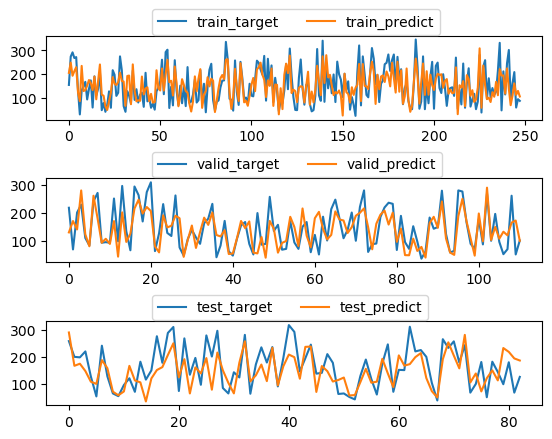

In [41]:
# please implement your code for task 2 here
lr = LinearRegression()
lr.fit(train_data, train_target)
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")
print()
print("training loss using sklearn - mSE: %.2f" % (mean_squared_error(train_target, lr.predict(train_data))))
print("validation loss using sklearn - MSE: %.2f" % (mean_squared_error(valid_target, lr.predict(valid_data))))
print("testing loss using sklearn - MSE: %.2f" % (mean_squared_error(test_target, lr.predict(test_data))))

print()

print("training loss using CS4210-style - MSE: %.2f" % (np.mean((lr.predict(train_data) - train_target) ** 2) / 2))
print("validation loss using CS4210-style - MSE: %.2f" % (np.mean((lr.predict(valid_data) - valid_target) ** 2) / 2))
print("testing loss using CS4210-style - MSE: %.2f" % (np.mean((lr.predict(test_data) - test_target) ** 2) / 2))
print()

fig = plt.figure()
fig.subplots_adjust(hspace=.7)

plt.subplot(3, 1, 1)
plt.plot(np.arange(train_target.shape[0]), train_target, label="train_target")
plt.plot(np.arange(train_target.shape[0]), lr.predict(train_data), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3, 1, 2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label="valid_target")
plt.plot(np.arange(valid_target.shape[0]), lr.predict(valid_data), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)

plt.subplot(3, 1, 3)
plt.plot(np.arange(test_target.shape[0]), test_target, label="test_target")
plt.plot(np.arange(test_target.shape[0]), lr.predict(test_data), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)



print("training score: %.3f" % lr.score(train_data, train_target))
print("validation score: %.3f" % lr.score(valid_data, valid_target))
print("testing score: %.3f" % lr.score(test_data, test_target))

<h4> Task 3: Use basic gradient descent to perform linear regression in the following cell</h4>

Note: Basic gradient descent method computes the gradient using whole training data examples in each iteration.


training loss using CS4210-style - MSE: 1415.71
training loss using CS4210-style - MSE: 1409.01
training loss using CS4210-style - MSE: 1738.35





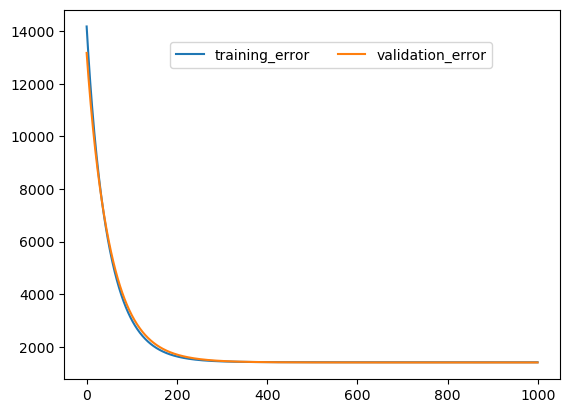

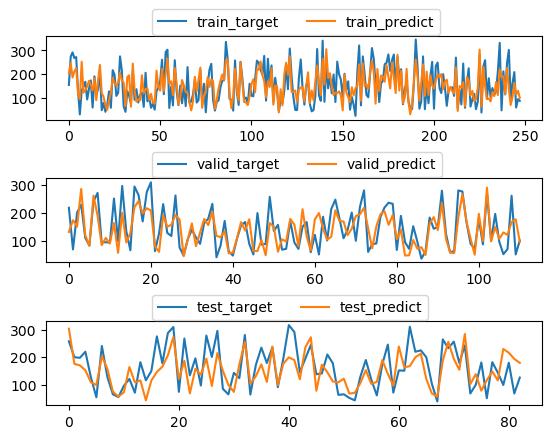

In [42]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.01   # learning rate
numItrs = 1000   # number of iterations

# please implement your code for task 3 here
from sklearn import preprocessing
scalar = preprocessing.StandardScaler().fit(train_data)
train_data = scalar.transform(train_data)
valid_data = scalar.transform(valid_data)
test_data = scalar.transform(test_data)

train_data_intercept = np.insert(train_data, 0, 1, axis=1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

def myModelFunction(X, w):
    return np.dot(X, w)

def myLossFunction(X, w, y):
    return np.mean((myModelFunction(X, w) - y) ** 2) / 2

def myTrianingLoop(
    train_data, 
    train_target, 
    valid_data, 
    valid_target, 
    learning_rate, 
    numItrs,
    ):
    train_losses = np.zeros((numItrs, 1))
    valid_losses = np.zeros((numItrs, 1))
    w = np.random.normal(0, 1, (train_data.shape[1], 1))

    for i in range(numItrs):
        Xw = np.dot(train_data, w)
        grad = -1 * np.dot(train_data.T, (train_target - Xw)) / (train_data.shape[0])
        
        w = w + learning_rate * (-1 * grad)
        
        train_losses[i] = myLossFunction(train_data, w, train_target)
        valid_losses[i] = myLossFunction(valid_data, w, valid_target)
    return w, train_losses, valid_losses

w, train_losses, valid_losses = myTrianingLoop(
    train_data_intercept, 
    train_target,
    valid_data_intercept,
    valid_target,
    learning_rate,
    numItrs,
    )

plt.plot(np.arange(numItrs), train_losses, label = "training_error")
plt.plot(np.arange(numItrs), valid_losses, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

print("training loss using CS4210-style - MSE: %.2f" % (myLossFunction(train_data_intercept, w, train_target)))
print("training loss using CS4210-style - MSE: %.2f" % (myLossFunction(valid_data_intercept, w, valid_target)))
print("training loss using CS4210-style - MSE: %.2f" % (myLossFunction(test_data_intercept, w, test_target)))
print()

fig = plt.figure()
fig.subplots_adjust(hspace = .7)

plt.subplot(3, 1, 1)
plt.plot(np.arange(train_target.shape[0]), train_target, label="train_target")
plt.plot(np.arange(train_target.shape[0]), myModelFunction(train_data_intercept, w), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3, 1, 2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label = "valid_target")
plt.plot(np.arange(valid_target.shape[0]), myModelFunction(valid_data_intercept, w), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()
plt.subplot(3, 1, 3)
plt.plot(np.arange(test_target.shape[0]), test_target, label = "test_target")
plt.plot(np.arange(test_target.shape[0]), myModelFunction(test_data_intercept, w), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)

<h4> Task 4: Use stochastic gradient descent to perform linear regression in the following cell</h4>

Note:
* Stochastic gradient descent method computes the gradient using only a small **batch** of data examples in each iteration.
* Difference between iterations and epochs
> One **iteration** entails the processing of one batch of data, while one epoch entails the processing of the whole training data.





training loss using Stochastic Gradient Descent - MSE: 1396.24
training loss using Stochastic Gradient Descent - MSE: 1421.28
training loss using Stochastic Gradient Descent - MSE: 1740.09





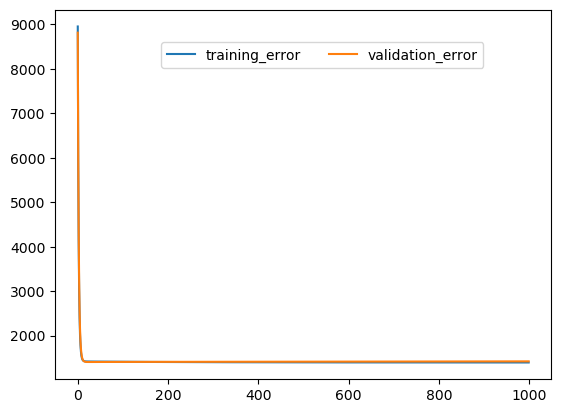

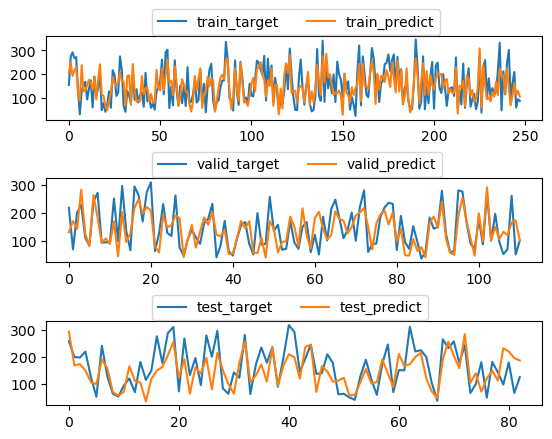

In [61]:
# you may use the following hyperparameters and experiment with various values for them
learning_rate = 0.01   # learning rate
batch_size = 10 # number of data samples in a batch
epochs = 1000   # number of epochs

# please implement your code for task 4 here
def myTrainingSGDLoop(
    train_data, 
    train_target, 
    valid_data, 
    valid_target, 
    learning_rate, 
    batch_size,
    epochs,
    ):
    train_losses = np.zeros((numItrs, 1))
    valid_losses = np.zeros((numItrs, 1))
    w = np.random.normal(0, 1, (train_data.shape[1], 1))

    for i in range(epochs):
        for j in range(0, train_data.shape[0], batch_size):
            k = j + batch_size
            batched_train_data = train_data[j:k]
            batched_train_target = train_target[j:k]
            #print(batched_train_data)
            
            Xw = np.dot(batched_train_data, w)
            grad = -1 * np.dot(batched_train_data.T, (batched_train_target - Xw)) / (batch_size)
            # 1/N * XT (t-Xw)
            
            w = w + learning_rate * (-1 * grad)
            
        train_losses[i] = myLossFunction(train_data, w, train_target)
        valid_losses[i] = myLossFunction(valid_data, w, valid_target)
    return w, train_losses, valid_losses

w, train_losses, valid_losses = myTrainingSGDLoop(
    train_data_intercept, 
    train_target,
    valid_data_intercept,
    valid_target,
    learning_rate,
    batch_size,
    epochs,
    )

plt.plot(np.arange(numItrs), train_losses, label = "training_error")
plt.plot(np.arange(numItrs), valid_losses, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

print("training loss using Stochastic Gradient Descent - MSE: %.2f" % (myLossFunction(train_data_intercept, w, train_target)))
print("training loss using Stochastic Gradient Descent - MSE: %.2f" % (myLossFunction(valid_data_intercept, w, valid_target)))
print("training loss using Stochastic Gradient Descent - MSE: %.2f" % (myLossFunction(test_data_intercept, w, test_target)))
print()

fig = plt.figure()
fig.subplots_adjust(hspace = .7)

plt.subplot(3, 1, 1)
plt.plot(np.arange(train_target.shape[0]), train_target, label="train_target")
plt.plot(np.arange(train_target.shape[0]), myModelFunction(train_data_intercept, w), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3, 1, 2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label = "valid_target")
plt.plot(np.arange(valid_target.shape[0]), myModelFunction(valid_data_intercept, w), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()
plt.subplot(3, 1, 3)
plt.plot(np.arange(test_target.shape[0]), test_target, label = "test_target")
plt.plot(np.arange(test_target.shape[0]), myModelFunction(test_data_intercept, w), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)